In [1]:
# Imports
import matplotlib.pyplot as plt
#-----------------------------------
import pandas as pd
from pandas import read_csv
#-----------------------------------
import numpy as np
#-----------------------------------
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.constraints import max_norm 
from tensorflow.keras.optimizers import SGD
#-------------------------------------
from sklearn import preprocessing as pp
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
# fix random seed for reproducibility
seed = 7 
np.random.seed(seed)

In [3]:
Sonar_df1 = pd.read_csv("sonar.csv", header = None)

In [4]:
Sonar_df1

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [5]:
enc = pp.LabelEncoder()

Sonar_df1.iloc[ : , 60] = enc.fit_transform(Sonar_df1.iloc[ : , 60])
Sonar_df1

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,0
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,0
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,0
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,0


In [6]:
sonar_df = shuffle(Sonar_df1)

In [8]:
sonar_df


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
11,0.0123,0.0309,0.0169,0.0313,0.0358,0.0102,0.0182,0.0579,0.1122,0.0835,...,0.0133,0.0265,0.0224,0.0074,0.0118,0.0026,0.0092,0.0009,0.0044,1
128,0.0374,0.0586,0.0628,0.0534,0.0255,0.1422,0.2072,0.2734,0.3070,0.2597,...,0.0118,0.0063,0.0237,0.0032,0.0087,0.0124,0.0113,0.0098,0.0126,0
158,0.0107,0.0453,0.0289,0.0713,0.1075,0.1019,0.1606,0.2119,0.3061,0.2936,...,0.0164,0.0120,0.0113,0.0021,0.0097,0.0072,0.0060,0.0017,0.0036,0
98,0.1313,0.2339,0.3059,0.4264,0.4010,0.1791,0.1853,0.0055,0.1929,0.2231,...,0.0362,0.0210,0.0154,0.0180,0.0013,0.0106,0.0127,0.0178,0.0231,0
131,0.1150,0.1163,0.0866,0.0358,0.0232,0.1267,0.2417,0.2661,0.4346,0.5378,...,0.0099,0.0065,0.0085,0.0166,0.0110,0.0190,0.0141,0.0068,0.0086,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,0.0231,0.0315,0.0170,0.0226,0.0410,0.0116,0.0223,0.0805,0.2365,0.2461,...,0.0125,0.0036,0.0123,0.0043,0.0114,0.0052,0.0091,0.0008,0.0092,0
67,0.0368,0.0403,0.0317,0.0293,0.0820,0.1342,0.1161,0.0663,0.0155,0.0506,...,0.0091,0.0160,0.0160,0.0081,0.0070,0.0135,0.0067,0.0078,0.0068,1
25,0.0201,0.0026,0.0138,0.0062,0.0133,0.0151,0.0541,0.0210,0.0505,0.1097,...,0.0108,0.0070,0.0063,0.0030,0.0011,0.0007,0.0024,0.0057,0.0044,1
196,0.0050,0.0017,0.0270,0.0450,0.0958,0.0830,0.0879,0.1220,0.1977,0.2282,...,0.0165,0.0056,0.0010,0.0027,0.0062,0.0024,0.0063,0.0017,0.0028,0


In [9]:
df_train = sonar_df.iloc[ : 144, :60]
df_train_labels = sonar_df.iloc[ :144, 60]

df_validation =  sonar_df.iloc[144:165 , :60]
df_validation_labels = sonar_df.iloc[144:165, 60]

df_test = sonar_df.iloc[165: , :60]
df_test_labels = sonar_df.iloc[165: , 60]

train_data = df_train.to_numpy()
train_labels = df_train_labels.to_numpy()

Validation_data = df_validation.to_numpy()
Validation_labels = df_validation_labels.to_numpy()

test_data = df_test.to_numpy()
test_labels = df_test_labels.to_numpy()

In [10]:
train_labels

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0])

In [11]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_validation_labels = to_categorical(Validation_labels)
one_hot_test_labels = to_categorical(test_labels)

In [12]:
one_hot_train_labels

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.

In [13]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dropout(0.4, input_shape=(60,)),
                                    tf.keras.layers.Dense(64, activation='relu', kernel_constraint=max_norm(3)),
                                    tf.keras.layers.Dense(32, activation='relu', kernel_constraint=max_norm(3)),
                                    tf.keras.layers.Dense(16, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')])


In [14]:
# Compile model
sgd = SGD(lr = 0.1, momentum = 0.8, decay = 0.002, nesterov = False)
model.compile(loss = 'binary_crossentropy', optimizer = sgd, metrics = ['accuracy'])

In [15]:
history = model.fit(train_data, train_labels, epochs = 500, validation_data =(Validation_data, Validation_labels))

Train on 144 samples, validate on 21 samples
Epoch 1/500
144/144 [==============================] - 6s 39ms/sample - loss: 0.7033 - accuracy: 0.4653 - val_loss: 0.6737 - val_accuracy: 0.6190
Epoch 2/500
144/144 [==============================] - 0s 1ms/sample - loss: 0.6991 - accuracy: 0.5417 - val_loss: 0.6706 - val_accuracy: 0.6190
Epoch 3/500
144/144 [==============================] - 0s 965us/sample - loss: 0.6919 - accuracy: 0.5347 - val_loss: 0.6771 - val_accuracy: 0.6190
Epoch 4/500
144/144 [==============================] - 0s 1ms/sample - loss: 0.6967 - accuracy: 0.4444 - val_loss: 0.6900 - val_accuracy: 0.4286
Epoch 5/500
144/144 [==============================] - 0s 764us/sample - loss: 0.6751 - accuracy: 0.5972 - val_loss: 0.6495 - val_accuracy: 0.6190
Epoch 6/500
144/144 [==============================] - 0s 736us/sample - loss: 0.6785 - accuracy: 0.5278 - val_loss: 0.6392 - val_accuracy: 0.6190
Epoch 7/500
144/144 [==============================] - 0s 785us/sample - loss:

144/144 [==============================] - 0s 688us/sample - loss: 0.5123 - accuracy: 0.7500 - val_loss: 0.3980 - val_accuracy: 0.8571
Epoch 112/500
144/144 [==============================] - 0s 625us/sample - loss: 0.4910 - accuracy: 0.7222 - val_loss: 0.3389 - val_accuracy: 0.9048
Epoch 113/500
144/144 [==============================] - 0s 569us/sample - loss: 0.4591 - accuracy: 0.8125 - val_loss: 0.3267 - val_accuracy: 0.9048
Epoch 114/500
144/144 [==============================] - 0s 694us/sample - loss: 0.4777 - accuracy: 0.7500 - val_loss: 0.3013 - val_accuracy: 0.9048
Epoch 115/500
144/144 [==============================] - 0s 576us/sample - loss: 0.5028 - accuracy: 0.7083 - val_loss: 0.3042 - val_accuracy: 0.9048
Epoch 116/500
144/144 [==============================] - 0s 694us/sample - loss: 0.4673 - accuracy: 0.7639 - val_loss: 0.3407 - val_accuracy: 0.8571
Epoch 117/500
144/144 [==============================] - 0s 639us/sample - loss: 0.4673 - accuracy: 0.7708 - val_loss: 0

144/144 [==============================] - 0s 1ms/sample - loss: 0.4589 - accuracy: 0.7708 - val_loss: 0.3945 - val_accuracy: 0.8571
Epoch 222/500
144/144 [==============================] - 0s 882us/sample - loss: 0.4495 - accuracy: 0.7708 - val_loss: 0.3620 - val_accuracy: 0.8571
Epoch 223/500
144/144 [==============================] - 0s 708us/sample - loss: 0.4127 - accuracy: 0.7986 - val_loss: 0.3590 - val_accuracy: 0.8571
Epoch 224/500
144/144 [==============================] - 0s 660us/sample - loss: 0.3719 - accuracy: 0.8125 - val_loss: 0.3565 - val_accuracy: 0.8095
Epoch 225/500
144/144 [==============================] - 0s 611us/sample - loss: 0.3960 - accuracy: 0.7847 - val_loss: 0.3133 - val_accuracy: 0.8571
Epoch 226/500
144/144 [==============================] - 0s 778us/sample - loss: 0.5365 - accuracy: 0.7431 - val_loss: 0.3054 - val_accuracy: 0.9524
Epoch 227/500
144/144 [==============================] - 0s 639us/sample - loss: 0.5304 - accuracy: 0.7014 - val_loss: 0.3

144/144 [==============================] - 0s 2ms/sample - loss: 0.4098 - accuracy: 0.7986 - val_loss: 0.3469 - val_accuracy: 0.8571
Epoch 332/500
144/144 [==============================] - 0s 688us/sample - loss: 0.4961 - accuracy: 0.7569 - val_loss: 0.3674 - val_accuracy: 0.8571
Epoch 333/500
144/144 [==============================] - 0s 1ms/sample - loss: 0.4180 - accuracy: 0.8056 - val_loss: 0.4410 - val_accuracy: 0.8095
Epoch 334/500
144/144 [==============================] - 0s 604us/sample - loss: 0.4627 - accuracy: 0.8194 - val_loss: 0.3912 - val_accuracy: 0.7619
Epoch 335/500
144/144 [==============================] - 0s 1ms/sample - loss: 0.4537 - accuracy: 0.7847 - val_loss: 0.3567 - val_accuracy: 0.9048
Epoch 336/500
144/144 [==============================] - 0s 1ms/sample - loss: 0.3999 - accuracy: 0.7986 - val_loss: 0.4169 - val_accuracy: 0.7619
Epoch 337/500
144/144 [==============================] - 0s 3ms/sample - loss: 0.4055 - accuracy: 0.8194 - val_loss: 0.3554 - va

144/144 [==============================] - 0s 1ms/sample - loss: 0.3872 - accuracy: 0.8264 - val_loss: 0.3467 - val_accuracy: 0.7619
Epoch 442/500
144/144 [==============================] - 0s 1ms/sample - loss: 0.4303 - accuracy: 0.8056 - val_loss: 0.3489 - val_accuracy: 0.7619
Epoch 443/500
144/144 [==============================] - 0s 639us/sample - loss: 0.4712 - accuracy: 0.7639 - val_loss: 0.3481 - val_accuracy: 0.7619
Epoch 444/500
144/144 [==============================] - 0s 653us/sample - loss: 0.3950 - accuracy: 0.8194 - val_loss: 0.4047 - val_accuracy: 0.7619
Epoch 445/500
144/144 [==============================] - 0s 625us/sample - loss: 0.4456 - accuracy: 0.8264 - val_loss: 0.3993 - val_accuracy: 0.7619
Epoch 446/500
144/144 [==============================] - 0s 625us/sample - loss: 0.4051 - accuracy: 0.8125 - val_loss: 0.3954 - val_accuracy: 0.7619
Epoch 447/500
144/144 [==============================] - 0s 639us/sample - loss: 0.3474 - accuracy: 0.8472 - val_loss: 0.345

In [16]:
test_error_rate = model.evaluate(test_data, test_labels, verbose=2)
test_error_rate

43/1 - 0s - loss: 0.3030 - accuracy: 0.8372


[0.39243797299473787, 0.8372093]

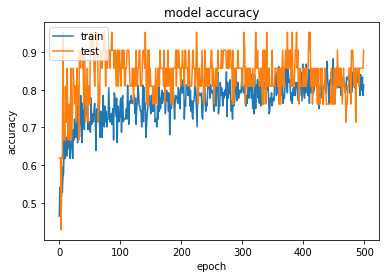

In [17]:
# # summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# BY KFOLD 

In [18]:
def create_baseline():
    # create model write code below
    model = Sequential()
    # model.add(Dense(90, activation = 'relu', input_shape = (train_data.shape[1],))) # number of fearures (60) are used as vector in input shape
    # model.add(Dense(1, activation = 'sigmoid'))
    model.add(Dense(90, activation = 'relu', input_shape = (train_data.shape[1],)))
    #model.add(Dense(30, activation = 'relu', input_shape = (train_data.shape[1],)))
    
    model.add(Dense(32, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    # Compile model, write code below
    model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ["accuracy"])
    return model

In [25]:
estimator = KerasClassifier(build_fn=create_baseline, epochs=25, batch_size=32, verbose=2)
kfold = StratifiedKFold(n_splits=30, shuffle=True, random_state=seed)
results = cross_val_score(estimator, train_data, test_data, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

ValueError: Found input variables with inconsistent numbers of samples: [144, 43]

In [23]:
estimator = KerasClassifier(build_fn = create_baseline, epochs = 25, batch_size = 32, verbose = 2)
kfold = StratifiedKFold(n_splits = 30, shuffle = True, random_state = seed)
results = cross_val_score(estimator, train_data, test_data, cv = kfold)
print('Result:/n' (results.mean()* 100, result.std()*100))

ValueError: Found input variables with inconsistent numbers of samples: [144, 43]